In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import win32com.client as win32
import subprocess
from pathlib import Path
import base64
import json
from bs4 import BeautifulSoup
import pandas_gbq as pbq
    
mpl.rcParams['font.family'] = 'consolas'
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.titleweight"] = "bold"

plt.style.use(r'C:\Users\KamilcS\OneDrive - Universal Music Group\projects\matplotlibrc')

palette = json.load(open(r'C:\Users\KamilcS\OneDrive - Universal Music Group\projects\palette.json'))

pd.set_option('display.max_rows', None)
# palette

In [148]:


# Roar: 
# 007377515
# 2020-04-03
  
# Burn Bright: 
# 007426222
# 2022-04-08


In [3]:
# meta_data_1 = """
# SELECT 
#   DISTINCT product_id, release_album, project_release_date, master_artist,
#   DATE_ADD(project_release_date, INTERVAL 6 MONTH) half_year_from_drop
# FROM `umg-finance.metadata.microstrategy_product` WHERE master_artist = 'Passion' AND release_album = 'Roar'"""

# meta_data_2 = """
# SELECT 
#   DISTINCT product_id, release_album, project_release_date, master_artist, 
#   DATE_ADD(project_release_date, INTERVAL 6 MONTH) half_year_from_drop
# FROM `umg-finance.metadata.microstrategy_product` WHERE master_artist = 'Passion' AND release_album = 'Burn Bright'"""



# query1 = """SELECT 
#   b.master_artist,
#   b.release_album,
#   EXTRACT(week FROM a.transaction_date) AS week,
#   SUM(a.units) AS units,
# FROM `umg-finance.consumption.prelim_transactions` as a
# JOIN (
# SELECT 
#   DISTINCT product_id, release_album, project_release_date, master_artist,
#   DATE_ADD(project_release_date, INTERVAL 6 MONTH) half_year_from_drop
# FROM `umg-finance.metadata.microstrategy_product` WHERE master_artist = 'Passion' AND release_album = 'Roar'
# )
#  as b
#   ON a.product_id = b.product_id
# WHERE transaction_date BETWEEN '{date_start}' AND '{date_end}'
# GROUP BY 1, 2, 3
# """

# query2 = """
# SELECT 
#   b.master_artist,
#   b.release_album,
#   EXTRACT(week FROM a.transaction_date) AS week,
#   SUM(a.units) AS units,
# FROM `umg-finance.consumption.prelim_transactions` as a
# JOIN (
#     SELECT 
#   DISTINCT product_id, release_album, project_release_date, master_artist, 
#   DATE_ADD(project_release_date, INTERVAL 6 MONTH) half_year_from_drop
# FROM `umg-finance.metadata.microstrategy_product` WHERE master_artist = 'Passion' AND release_album = 'Burn Bright'
# ) as b
#   ON a.product_id = b.product_id
# WHERE transaction_date BETWEEN '{date_start}' AND '{date_end}'
# GROUP BY 1, 2, 3;
# """

# def pull_data(q):
#     df = pbq.read_gbq(q, project_id='umg-us')
#     return df

In [28]:
# meta_data_1_df = pull_data(meta_data_1)

# df1 = pull_data(query1.format( 
#     date_start= str(meta_data_1_df.project_release_date.unique()[0]),
#     date_end = str(meta_data_1_df.half_year_from_drop.unique()[0])
#     ))

Downloading: 100%|██████████| 28/28 [00:00<00:00, 133.04rows/s]


In [25]:
# query1.format( 
#     date_start= str(meta_data_1_df.project_release_date.unique()[0]),
#     date_end = str(meta_data_1_df.half_year_from_drop.unique()[0])
#     )

"SELECT \n  b.master_artist,\n  b.release_album,\n  EXTRACT(MONTH FROM a.transaction_date) AS month,\n  SUM(a.units) AS units,\nFROM `umg-finance.consumption.prelim_transactions` as a\nJOIN (\nSELECT \n  DISTINCT product_id, release_album, project_release_date, master_artist,\n  DATE_ADD(project_release_date, INTERVAL 6 MONTH) half_year_from_drop\nFROM `umg-finance.metadata.microstrategy_product` WHERE master_artist = 'Passion' AND release_album = 'Roar'\n)\n as b\n  ON a.product_id = b.product_id\nWHERE transaction_date BETWEEN '2020-03-13' AND '2020-09-13'\nGROUP BY 1, 2, 3\n"

In [29]:
# meta_data_2_df = pull_data(meta_data_2)

# df2 = pull_data(query2.format( 
#     date_start= str(meta_data_2_df.project_release_date.unique()[0]),
#     date_end = str(meta_data_2_df.half_year_from_drop.unique()[0])
#     ))

Downloading: 100%|██████████| 27/27 [00:00<00:00, 142.03rows/s]


In [35]:
# query = """
# SELECT 
#   b.master_artist,
#   b.release_album,
#   -- EXTRACT(MONTH FROM a.transaction_date) AS month,
#   -- REPLACE(REPLACE(REPLACE(sub_account_name , ' - Prime', ''), ' - Unlimited', ''), ' ', '_') as account, 
#   a.transaction_date,
#   SUM(a.units) as units
# FROM `umg-finance.consumption.prelim_transactions` as a
# JOIN (
# SELECT 
#   DISTINCT product_id, release_album, project_release_date, master_artist,
#   DATE_ADD(project_release_date, INTERVAL 6 MONTH) half_year_from_drop
# FROM `umg-finance.metadata.microstrategy_product` WHERE master_artist = 'Passion' AND release_album = 'Roar'
# ) as b
#   ON a.product_id = b.product_id
# WHERE transaction_date BETWEEN b.project_release_date AND b.half_year_from_drop
# GROUP BY 1, 2, 3
# UNION ALL
# SELECT
#   b.master_artist,
#   b.release_album,
#   -- EXTRACT(MONTH FROM a.transaction_date) AS month,
#   -- REPLACE(REPLACE(REPLACE(sub_account_name , ' - Prime', ''), ' - Unlimited', ''), ' ', '_') as account, 
#   a.transaction_date,
#   SUM(a.units) as units
# FROM `umg-finance.consumption.prelim_transactions` as a
# JOIN (
# SELECT 
#   DISTINCT product_id, release_album, project_release_date, master_artist, 
#   DATE_ADD(project_release_date, INTERVAL 6 MONTH) half_year_from_drop
# FROM `umg-finance.metadata.microstrategy_product` WHERE master_artist = 'Passion' AND release_album = 'Burn Bright'
# ) as b
#   ON a.product_id = b.product_id
# WHERE transaction_date BETWEEN b.project_release_date AND b.half_year_from_drop
# GROUP BY 1, 2, 3
# """

# df = pull_data(query)
# df.to_csv('./data/passion_roar_burnbright_6_month_post_release.csv', index=False)

In [8]:
# df_roar = pd.read_excel(r'C:\Users\KamilcS\OneDrive - Universal Music Group\projects\ADHOC_ALBUMS_COMPARE\data\passion_roar_6month_microstrategy.xlsx', skiprows=[0, 1, 3])
# df_burn = pd.read_excel(r'C:\Users\KamilcS\OneDrive - Universal Music Group\projects\ADHOC_ALBUMS_COMPARE\data\passion_burn_6month_microstrategy.xlsx', skiprows=[0, 1, 3])

# df_roar.rename({'Unnamed: 2': 'Global Week Date'}, axis=1, inplace=True)
# # df_roar['Master Album'] = 'Roar'

# df_burn.rename({'Unnamed: 2': 'Global Week Date'}, axis=1, inplace=True)
# df_burn['Master Album'] = 'Burn Bright'

# df_roar = df_roar.groupby('Global Week')['Units'].sum()

# df_burn = df_burn.groupby('Global Week')['Units'].sum()

c:\Users\KamilcS\Miniconda3\envs\env1\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\KamilcS\Miniconda3\envs\env1\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [15]:
# df_roar['R2 Project Description'].apply(lambda x: x.split('/')[1])

# df_burn['R2 Project Description'].apply(lambda x: x.split('/')[1])

In [162]:
def prepare_ms_data(in_path, album):
    
    df = pd.read_excel(in_path, skiprows=[0, 1, 3])
    df.rename({'Unnamed: 2': 'Global Week Date'}, axis=1, inplace=True)

    print(df['R2 Project Description'].unique())
 
    df['Account'] = df['Account'].str.lower()

    df['Album Adjusted Units'] = np.where(
        df['Usage Group'].str.contains('Streaming', regex=False), df['Units'].div(1500), 
        np.where(
            df['Usage Group'].str.contains('Download (Track)', regex=False), df['Units'].div(10), df['Units']
        )
    )

    df['Raw Streams'] = np.where(
        df['Usage Group'].str.contains('Streaming', regex=False), df['Units'], 0
    )

    # df['Master Album'] = df['R2 Project Description'].apply(lambda x: x.split('/')[-1])

    df['Global Week'] = df['Global Week'].astype(str)

    df['Master Album'] = album

    df = df.groupby(['Global Week', 'Master Album']).agg({
        'Units': sum,
        'Album Adjusted Units' : sum,
        'Raw Streams': sum,
        # 'Global Week': 'first'

    }).sort_index().reset_index()

    # df = df.pivot_table(index='Global Week', columns='Account', values='Raw Streams', aggfunc='mean', fill_value=0).reset_index(drop=True)
    # df = df.loc[:, (df != 0).any(axis=0)]
    
    df.index = df.index + 1

    df.index.name = 'Weeks Post Release'

    df = df.loc[:16]

    return df



In [163]:
df_roar = prepare_ms_data(
    r'C:\Users\KamilcS\OneDrive - Universal Music Group\projects\ADHOC_ALBUMS_COMPARE\data\passion_roar_6month_microstrategy.xlsx',
    'Roar'
    )
df_burn = prepare_ms_data(
    r'C:\Users\KamilcS\OneDrive - Universal Music Group\projects\ADHOC_ALBUMS_COMPARE\data\passion_burn_6month_microstrategy.xlsx',
    'Burn Bright'
    )

c:\Users\KamilcS\Miniconda3\envs\env1\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


['Passion/Roar (Live)/LP10']


c:\Users\KamilcS\Miniconda3\envs\env1\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


['Passion/Burn Bright/LP12']


In [164]:
# joined = df_roar.join(other=df_burn, lsuffix=' Roar', rsuffix=' Burn Bright').fillna(0).astype(int).reset_index()

joined = pd.concat([df_roar, df_burn]).reset_index()
# joined

C:\Users\KamilcS\AppData\Local\Temp\ipykernel_21692\444389470.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


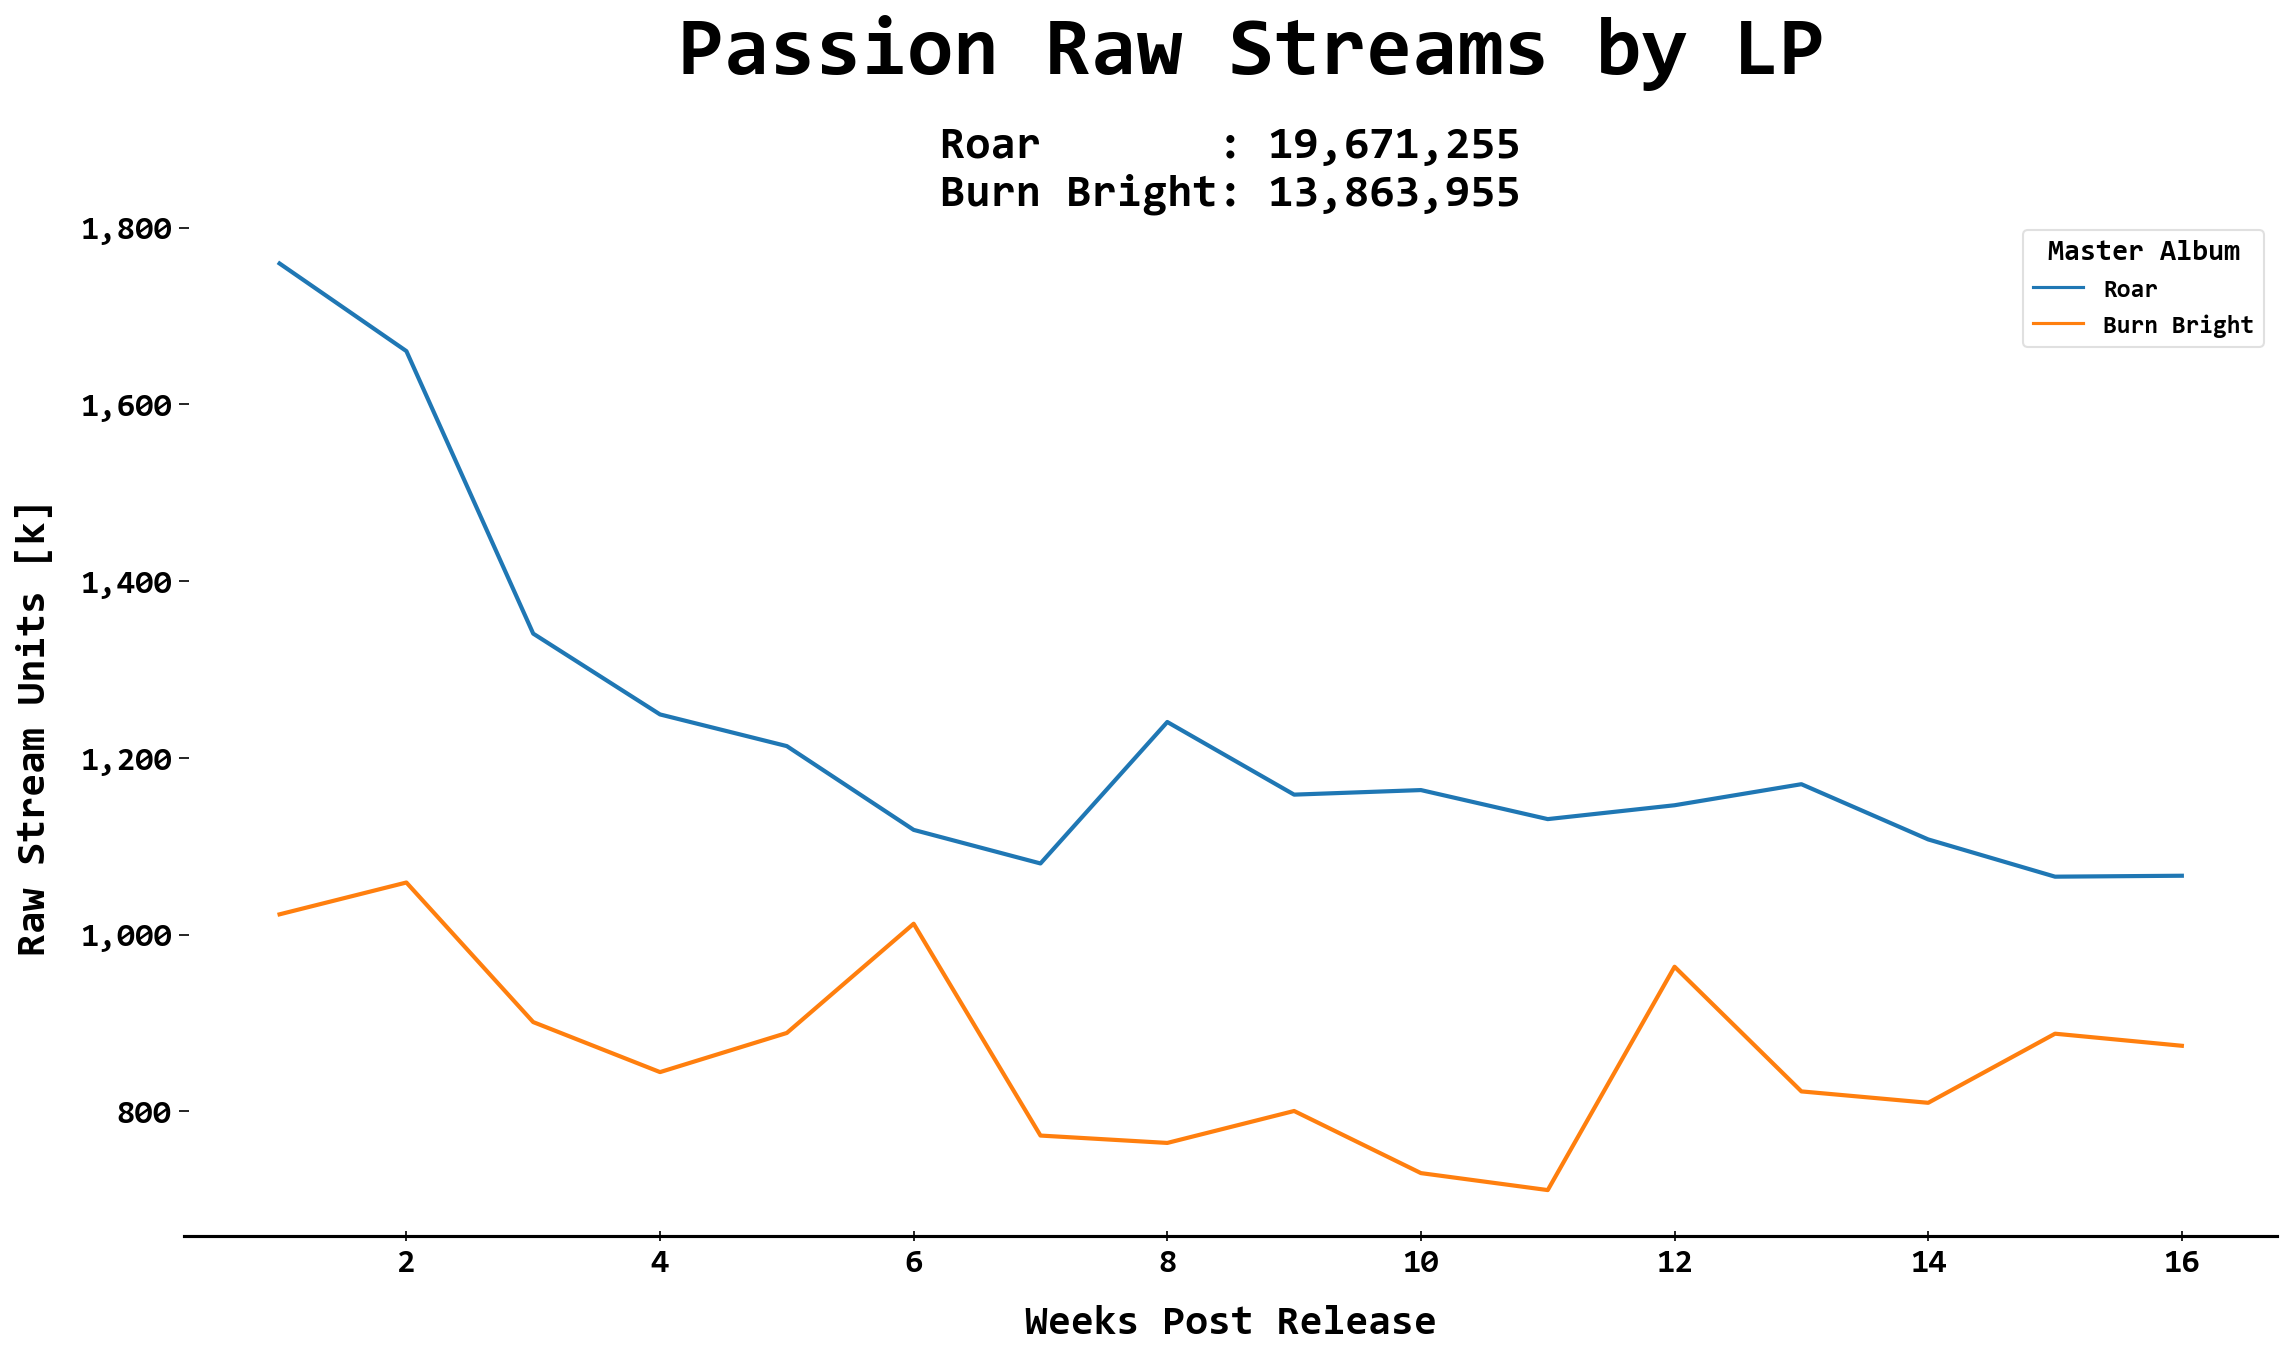

In [165]:
image_path = './outputs/passion_roar_burnbright.png'
excel_path = './outputs/passion_roar_burnbright.xlsx'

fig, ax = plt.subplots(figsize=(18, 9), dpi=150)

raw_streams_roar = joined.query('`Master Album` == "Roar"')['Raw Streams'].sum()
raw_streams_burn = joined.query('`Master Album` == "Burn Bright"')['Raw Streams'].sum()

fig.suptitle('Passion Raw Streams by LP', size = 40, weight="bold", y=1.03, x=0.52)
sns.lineplot(
    data=joined, 
    x='Weeks Post Release', 
    # x = 'Days Post Release',
    y='Raw Streams', 
    hue='Master Album', 
    ax=ax,
    linewidth = 2,
    ).set(
    xlabel='Weeks Post Release',
    # xlabel='Days Post Release',
    ylabel='Raw Stream Units [k]',
    title=f'Roar       : {raw_streams_roar:,.0f}\nBurn Bright: {raw_streams_burn:,.0f}'
    # ylabel='Raw Streams'
    )

ylabels = [
    '{:,.0f}'.format(x) for x in ax.get_yticks() /1000
]


sns.despine(left=True)
ax.set_yticklabels(ylabels)
fig.savefig(image_path, bbox_inches="tight")


In [53]:
# joined_consumption.pivot_table(index=['', 'Master Album', 'Weeks Post Release', 'Global Week'], columns='Master Album', values='Album Adjusted Units')

In [171]:


def group_and_swap(df, column):

    df1 = df.reset_index().groupby(['Master Album', 'Weeks Post Release', 'Global Week'])[[column]].sum()

    df1 = df1.reset_index('Global Week').unstack(0).swaplevel(0, 1, axis=1)

    df1.loc['TOTAL'] = ['', int(df[column].sum())]

    return df1



In [173]:
title_2 = 'PASSION RAW STREAMS'
df_roar_2 = group_and_swap(df_roar, 'Raw Streams')
df_burn_2 = group_and_swap(df_burn, 'Raw Streams')

title_1 = 'PASSION CONSUMPTION'
df_roar_1 = group_and_swap(df_roar, 'Album Adjusted Units')
df_burn_1 = group_and_swap(df_burn, 'Album Adjusted Units')


with pd.ExcelWriter(excel_path) as writer:
    pd.concat([df_roar_2, df_burn_2], axis=1).style.format("{:,f}").to_excel(writer, sheet_name=title_2.lower().replace(' ', '_'))
    pd.concat([df_roar_1, df_burn_1], axis=1).style.format("{:,f}").to_excel(writer, sheet_name=title_1.lower().replace(' ', '_'))
    
# 
# pd.concat([df_roar_1, df_burn_1], axis=1)#.style.format("{:,f}")
# pd.concat([df_roar_2, df_burn_2], axis=1)#.style.format("{:,f}")

In [47]:

# title = 'PASSION CONSUMPTION'
# joined_consumption = pd.concat([df_roar, df_burn], axis=0).reset_index()
# joined_consumption[''] = joined_consumption[''] = title
# joined_consumption = (
    # joined_consumption.groupby(['', 'Master Album','Global Week',  'Weeks Post Release'])[['Album Adjusted Units']].sum()
    # .unstack(0)
    # .unstack(0)
    # .fillna(0)
    # .astype(int)
    # .swaplevel(0, 1, axis=1)
    # )
# joined_consumption.loc["TOTAL"] = joined_consumption.sum()

# joined_consumption.style.format("{:,.0f}").background_gradient(cmap='Blues', axis=None)#.to_excel(excel_path, sheet_name=title.lower().replace(' ', '_'))




In [205]:

# title = 'PASSION RAW STREAMS'
# joined_raw_streams = pd.concat([df_roar, df_burn], axis=0).reset_index()
# joined_raw_streams[''] = joined_raw_streams[''] = 'PASSION RAW STREAMS'
# joined_raw_streams = joined_raw_streams.groupby(['', 'Master Album', 'Weeks Post Release'])[['Raw Streams']].sum().unstack(0).unstack(0).fillna(0).astype(int).swaplevel(0, 1, axis=1)
# joined_raw_streams.loc["TOTAL"] = joined_raw_streams.sum()

# joined_raw_streams.style.format("{:,.0f}").background_gradient(cmap='Blues', axis=None).to_excel(excel_path, sheet_name=title.lower().replace(' ', '_'))

,Album Adjusted Units (LP10),Album Adjusted Units (LP12)
Weeks Post Release,,
1,1564,763
2,1454,794
3,1107,663
4,1016,601
5,991,632
6,892,704
7,866,547
8,1082,552
9,946,579
